<a href="https://colab.research.google.com/github/dhyu12/yolov3/blob/master/yolo_v3_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch-YOLOv3

- 깃헙 원문링크: https://github.com/eriklindernoren/PyTorch-YOLOv3
- PyTorch 로 구현한 YOLOv3 를 Colaboratory 에서 실행해보자. 
- Coloaboratory 의 런타임 >> 런타임 유형변경에서 GPU 사용을 체크하는 것을 잊지말자

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 폴더 이동후 필요한 package 를 설치해준다

In [35]:
cd '/content/drive/My Drive/PyTorch-YOLOv3-master/'

/content/drive/My Drive/PyTorch-YOLOv3-master


In [21]:
!pip3 install -r requirements.txt

## 에러 발생. 
- torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
- Pillow 버전이 맞지 않는다고 하니 기존의 Pillow 를 uninstall 한 다음 최신으로 install 해준다. 

In [22]:
!pip3 uninstall Pillow -y

Uninstalling Pillow-7.2.0:
  Successfully uninstalled Pillow-7.2.0


In [23]:
!pip3 install Pillow

  Using cached https://files.pythonhosted.org/packages/30/bf/92385b4262178ca22b34f82e0e09c2922eb351fe39f3cc7b8ba9ea555b41/Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## 이미 학습 완료한 weight 를 다운로드 받는다

In [36]:
cd weights/

/content/drive/My Drive/PyTorch-YOLOv3-master/weights


In [29]:
!ls

download_weights.sh


In [30]:
# 스크립트 내용을 한 번 볼까? 
!cat /content/PyTorch-YOLOv3/weights/download_weights.sh

#!/bin/bash
# Download weights for vanilla YOLOv3
wget -c https://pjreddie.com/media/files/yolov3.weights
# # Download weights for tiny YOLOv3
wget -c https://pjreddie.com/media/files/yolov3-tiny.weights
# Download weights for backbone network
wget -c https://pjreddie.com/media/files/darknet53.conv.74


In [31]:
!bash download_weights.sh

--2020-08-28 14:08:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1.00MB/s    in 5m 15s  

2020-08-28 14:13:22 (769 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2020-08-28 14:13:22--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  1.16MB/s    in 30s     

2020-08-28 14:13:54 (1.11 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

--2020

# 이제 예측을 해보자 
- 상위 폴더로 이동후 
- detect.py 파일을 실행하자
- 이때 --image_folder 옵션에 이미지들이 들어있는 폴더를 지정해주면 된다. 

In [32]:
cd ..

/content/drive/My Drive/PyTorch-YOLOv3-master


In [33]:
cd data/

/content/drive/My Drive/PyTorch-YOLOv3-master/data


In [49]:
cd /content/drive/My Drive/PyTorch-YOLOv3-master/

/content/drive/My Drive/PyTorch-YOLOv3-master


In [55]:
 !python3 train.py

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

---- [Epoch 85/100, Batch 5/8] ----
+------------+--------------+--------------+--------------+
| Metrics    | YOLO Layer 0 | YOLO Layer 1 | YOLO Layer 2 |
+------------+--------------+--------------+--------------+
| grid_size  | 10           | 20           | 40           |
| loss       | 2.139503     | 1.626178     | 1.779971     |
| x          | 0.101092     | 0.104379     | 0.062965     |
| y          | 0.077130     | 0.127174     | 0.106483     |
| w          | 0.054133     | 0.072685     | 0.159293     |
| h          | 0.119764     | 0.036579     | 0.070234     |
| conf       | 1.673924     | 1.262041     | 1.341978     |
| cls        | 0.113461     | 0.023319     | 0.039018     |
| cls_acc    | 87.50%       | 100.00%      | 100.00%      |
| recall50   | 0.625000     | 0.500000     | 0.500000     |
| recall75   | 0.000000     | 0.375000     | 0.375000     |
| precision  | 0.384615     | 0.148148     | 0.043478     |
| conf_obj   | 0.587522    

In [82]:
ls -al data/custom_samples/

total 9
drwx------ 2 root root 4096 Aug 28 18:46 .ipynb_checkpoints/
-rw------- 1 root root 4354 Aug 28 19:17 testimage.jpg


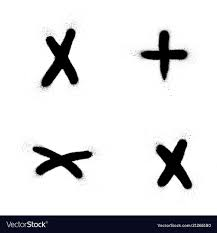

In [83]:
from IPython.display import Image
Image('/content/drive/My Drive/PyTorch-YOLOv3-master/data/custom_samples/testimage.jpg')

In [84]:
!python3 detect.py --image_folder data/custom_samples/

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.8, image_folder='data/custom_samples/', img_size=416, model_def='config/yolov3_custom.cfg', n_cpu=0, nms_thres=0.4, weights_path='/content/drive/My Drive/weight/yolov3_ckpt_99.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.118136

Saving images:
(0) Image: 'data/custom_samples/testimage.jpg'
	+ Label: add, Conf: 0.91675


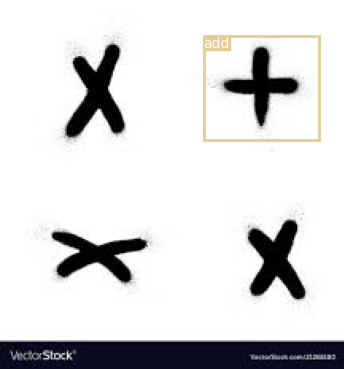

In [85]:
Image('/content/drive/My Drive/PyTorch-YOLOv3-master/output/testimage.png')